In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_data.csv')
df.shape

(40428967, 18)

In [3]:
df.head()

,click,hour,C1,banner_pos,device_model,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,user_id,pub_id,pub_domain,pub_category
0,0,14102100,1005,0,44956a24,2,15706,320,50,1722,0,35,-1,79,ip-ddd2926e-44956a24,1fbe01fe,f3845767,28905ebd
1,0,14102100,1005,0,711ee120,0,15704,320,50,1722,0,35,100084,79,ip-96809ac8-711ee120,1fbe01fe,f3845767,28905ebd
2,0,14102100,1005,0,8a4875bd,0,15704,320,50,1722,0,35,100084,79,ip-b3cf8def-8a4875bd,1fbe01fe,f3845767,28905ebd
3,0,14102100,1005,0,6332421a,0,15706,320,50,1722,0,35,100084,79,ip-e8275b8f-6332421a,1fbe01fe,f3845767,28905ebd
4,0,14102100,1005,1,779d90c2,0,18993,320,50,2161,0,35,-1,157,ip-9644d0bf-779d90c2,fe8cc448,9166c161,0569f928


In [4]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,click,hour,C1,banner_pos,device_model,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,user_id,pub_id,pub_domain,pub_category
0,0,14102709,1005,1,8a4875bd,0,20007,320,50,2283,0,163,100076,95,ip-4334c76d-8a4875bd,5b4d2eda,16a36ef3,f028772b
1,0,14103023,1005,0,c64f1736,0,16859,320,50,1887,3,39,-1,23,ip-1780e267-c64f1736,4bf5bbe2,6b560cc1,28905ebd
2,1,14102807,1005,1,cdf6ea96,0,22811,320,50,2647,2,35,100148,23,ip-90b17173-cdf6ea96,e151e245,7e091613,f028772b
3,0,14102116,1005,0,c730b3c6,0,16688,320,50,1873,3,39,-1,23,id-5ebb0ca9,54c5d545,2347f47a,0f2161f8
4,0,14103006,1005,0,744ae245,0,23804,320,50,2726,3,803,-1,229,ip-160f55d9-744ae245,c105f675,2347f47a,0f2161f8


In [5]:
df = df[~df.duplicated(keep='first')]
df.shape

(28820693, 18)

# remove users with no zeros and no ones

In [6]:
# select only yes clicks
yes = df[df['click'] == 1]
# select user whose number of yes clicks is > 0
n = yes['user_id'].value_counts()[yes['user_id'].value_counts() > 0].index
df = df.loc[df['user_id'].isin(n)]

# select user whose number of no clicks is > 0
no = df[df['click'] == 0]
n = no['user_id'].value_counts()[no['user_id'].value_counts() > 0].index
df = df.loc[df['user_id'].isin(n)]
df.shape

(12788763, 18)

In [7]:
del yes
del no

In [8]:
len(df.user_id.unique())

1801359

# remove identical values at the same hour

In [9]:
cols = [i for i in df.columns if i not in ['click']]
cols

['hour',
 'C1',
 'banner_pos',
 'device_model',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'user_id',
 'pub_id',
 'pub_domain',
 'pub_category']

In [10]:
df = df[~df[cols].duplicated(keep='first')]
df.shape

(11534928, 18)

# remove unknown features and check again for duplicates

In [11]:
cols = ['C1', 'C15', 'C16', 'C18', 'C19']
df.drop(cols, axis=1, inplace=True)
cols = [i for i in df.columns if i not in ['click']]
df = df[~df[cols].duplicated(keep='first')]
df.shape

(11527875, 13)

In [12]:
len(df.user_id.unique())

1801359

# remove users with no zeros and no ones again

In [13]:
# select only yes clicks
yes = df[df['click'] == 1]
# select user whose number of yes clicks is > 0
n = yes['user_id'].value_counts()[yes['user_id'].value_counts() > 0].index
df = df.loc[df['user_id'].isin(n)]

# select user whose number of no clicks is > 0
no = df[df['click'] == 0]
n = no['user_id'].value_counts()[no['user_id'].value_counts() > 0].index
df = df.loc[df['user_id'].isin(n)]
df.shape

(10544382, 13)

In [14]:
len(df.user_id.unique())

1392150

# select min number of interactions

In [15]:
# select user whose number of interactions clicks is >= 20
no = df[df['click'] == 0]
n = no['user_id'].value_counts()[no['user_id'].value_counts() > 19].index
df = df.loc[df['user_id'].isin(n)]

In [16]:
df.shape

(4120562, 13)

In [17]:
for c in df.columns:
    print('{}: {}'.format(c, len(df[c].unique())))

click: 2
hour: 240
banner_pos: 7
device_model: 1933
device_conn_type: 4
C14: 2066
C17: 382
C20: 143
C21: 55
user_id: 62693
pub_id: 3117
pub_domain: 1459
pub_category: 39


Users that appear less than 30 times: 24.66%
Users that appear less than 50 times: 66.3%
Users that appear less than 100 times: 90.28%
Users that appear less than 1000 times: 99.6%


/home/nicolo.campolongo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


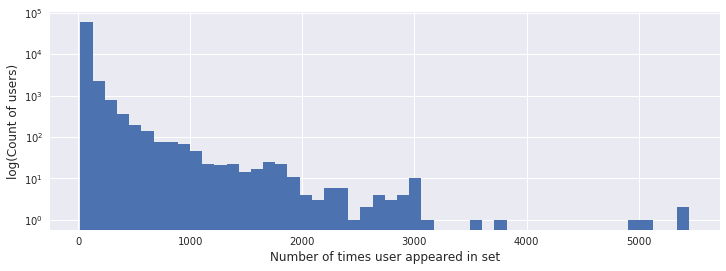

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

uuid_counts = df.groupby('user_id')['user_id'].count().sort_values()

for i in [30, 50, 100, 1000]:
    print('Users that appear less than {} times: {}%'.format(i, round((uuid_counts < i).mean() * 100, 2)))
    
plt.figure(figsize=(12, 4))
plt.hist(uuid_counts.values, bins=50, log=True)
plt.xlabel('Number of times user appeared in set', fontsize=12)
plt.ylabel('log(Count of users)', fontsize=12)
plt.show()

0.175
0.171
Users with yes click percentage less than 0.1: 29.39%
Users with yes click percentage less than 0.2: 57.95%
Users with yes click percentage less than 0.3: 86.82%
Users with yes click percentage less than 0.4: 98.11%
Users with yes click percentage less than 0.5: 99.81%
Users with yes click percentage less than 0.6: 99.98%
Users with yes click percentage less than 0.7: 100.0%
Users with yes click percentage less than 0.8: 100.0%
Users with yes click percentage less than 0.9: 100.0%


/home/nicolo.campolongo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


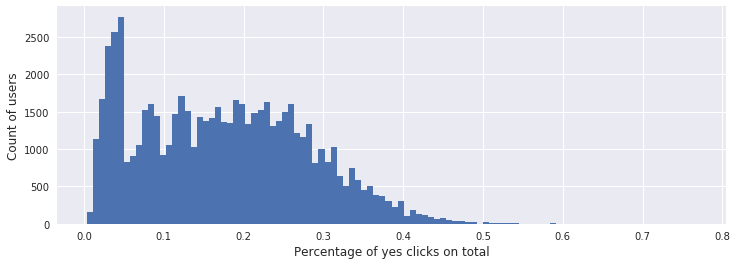

In [19]:

click_count = df[df['click']==1].groupby(['user_id', 'click'])['click'].size()
click_count = click_count / df.groupby(['user_id']).size()
print(round(click_count.mean(),3))
print(round(click_count.median(),3))

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print('Users with yes click percentage less than {}: {}%'.format(i, round((click_count < i).mean() * 100, 2)))
    
plt.figure(figsize=(12, 4))
plt.hist(click_count.values, bins=100, log=False)
plt.xlabel('Percentage of yes clicks on total', fontsize=12)
plt.ylabel('Count of users', fontsize=12)
plt.show()

In [20]:
click_count.head()

user_id      click
id-000b6e10  1        0.142857
id-000f48ef  1        0.045455
id-0011e621  1        0.062500
id-00146063  1        0.314286
id-00171260  1        0.036145
dtype: float64

In [21]:
df.to_csv('preprocessed_k20.csv', index=False)

# most frequent 100

In [22]:
n = df['user_id'].value_counts()[:100].index

In [23]:
df1 = df.loc[df['user_id'].isin(n)]

In [24]:
#df1.to_csv('preprocessed_100.csv', index=False)

# most frequent 1000

In [25]:
n = df['user_id'].value_counts()[:1000].index
df1 = df.loc[df['user_id'].isin(n)]
#df1.to_csv('preprocessed_1000.csv', index=False)

In [26]:
df1.shape

(871303, 13)